In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import h3
from math import prod
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
ln = True
alpha = 0.1
models = ['leapfrog', 'chain', 'naive', 'fcfs', 'favorite leapfrog', 'favorite mix', 'favorite chain']
resolution = 4

# amewoo, buwtea, lobcur, tunswa, sursco, sheowl, snoowl1
species = 'amewoo'

In [5]:
# disk radius
radius = 5
destination_radius = radius
departure_radius = radius

In [100]:
# Define seasons with start and end (month, day)
season_definitions = {
    'snoowl1': {
        'breeding': {'start': (7, 6), 'end': (16, 8)},  
        'wintering': {'start': (6, 12), 'end': (1, 3)}  
    },
    'sheowl': {
        'breeding': {'start': (17, 5), 'end': (16, 8)},  
        'wintering': {'start': (6, 12), 'end': (22, 2)}  
    },
    'bkpwar': {
        'breeding': {'start': (14, 6), 'end': (2, 8)},  
        'wintering': {'start': (13, 12), 'end': (5, 4)}  
    },
    'sursco': {
        'breeding': {'start': (7, 6), 'end': (26, 7)},  
        'wintering': {'start': (20, 12), 'end': (22, 2)}  
    },
    'tunswa': {
        'breeding': {'start': (7, 6), 'end': (26, 7)},  # 7 июнь-26 июль
        'wintering': {'start': (27, 12), 'end': (15, 2)}  # 27 дек.-15 февр.
    },
    'buwtea': {
        'breeding': {'start': (14, 6), 'end': (12, 7)},  # 14 июнь - 12 июль
        'wintering': {'start': (27, 12), 'end': (25, 1)}  #27 дек. - 25 янв.
    },
    'lobcur': {
        'breeding': {'start': (10, 5), 'end': (7, 6)},  # 10 май-7 июнь
        'wintering': {'start': (6, 12), 'end': (8, 2)}  # 6 дек. - 8 февр.
    },
    'amewoo': None
}

In [101]:
file_paths = {
    'snoowl1': 'snoowl1/Snowy owl - North America.csv',
    'sheowl': 'sheowl/Short-eared Owl, North America.csv',
    'bkpwar': 'bkpwar/Blackpoll Warbler eastern North America (data from DeLuca et al. 2015).csv',
    'sursco': 'sursco/surfScoter_USGS_ASC_argos.csv',
    'tunswa': 'tunswa/tundraSwan_USGS_ASC_argos.csv',
    'buwtea': 'buwtea/blueWingedTeal_USGS_ASC_argos.csv',
    'bubsan': 'bubsan/buffBreastedSandpiper_USGS_ASC_argosGPS.csv',
    'lobcur': 'lobcur/longBilledCurlew_USGS_ASC_argos.csv', 
    'amewoo': 'amewoo/USGS Woodcock Migration.csv'
}

In [102]:
df = pd.read_csv(file_paths[species])

In [103]:
df.head()

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,argos:altitude,argos:best-level,argos:calcul-freq,argos:iq,...,argos:valid-location-algorithm,argos:valid-location-manual,behavioural-classification,manually-marked-outlier,migration-stage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1140038630,True,2015-10-18 16:59:44.000,-85.943337,43.686439,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration
1,1140038631,True,2015-10-21 17:01:52.000,-85.941414,43.688972,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration
2,1140038632,True,2015-10-24 16:59:44.000,-85.936653,43.697803,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration
3,1140038633,True,2015-10-27 17:01:52.000,-85.955261,43.688538,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration
4,1140038634,True,2015-10-30 16:59:44.000,-85.953575,43.687973,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration


In [104]:
df.columns

Index(['event-id', 'visible', 'timestamp', 'location-long', 'location-lat',
       'algorithm-marked-outlier', 'argos:altitude', 'argos:best-level',
       'argos:calcul-freq', 'argos:iq', 'argos:lat1', 'argos:lat2', 'argos:lc',
       'argos:lon1', 'argos:lon2', 'argos:nb-mes', 'argos:nb-mes-120',
       'argos:nopc', 'argos:pass-duration', 'argos:sensor-1', 'argos:sensor-2',
       'argos:sensor-3', 'argos:sensor-4', 'argos:valid-location-algorithm',
       'argos:valid-location-manual', 'behavioural-classification',
       'manually-marked-outlier', 'migration-stage', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name'],
      dtype='object')

In [105]:
def is_date_in_season(date, season_start, season_end):
    """
    Check if a date falls within a season, handling seasons that cross year boundaries.
    
    Parameters:
    date: pandas Timestamp
    season_start: tuple (day, month)
    season_end: tuple (day, month)
    
    Returns:
    bool: True if date is in season
    """
    year = date.year
    start_date = pd.Timestamp(year, season_start[1], season_start[0])
    end_date = pd.Timestamp(year, season_end[1], season_end[0])
    
    # Handle seasons that cross year boundaries (e.g., Nov-Feb)
    if start_date > end_date:
        # Season crosses year boundary
        if date >= start_date or date <= end_date:
            return True
    else:
        # Normal season within same year
        if start_date <= date <= end_date:
            return True
    
    return False


In [106]:
if 'migration-stage' not in df.columns:
    # Parse timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Get season definitions for this species
    seasons = season_definitions.get(species, {})
    print(seasons)
    breeding_season = seasons['breeding']
    wintering_season = seasons['wintering']
    
    # Assign migration-stage based on date ranges
    df['migration-stage'] = 'None'  # initialize
    
    # Check for breeding season
    breeding_mask = df['timestamp'].apply(
        lambda x: is_date_in_season(x, breeding_season['start'], breeding_season['end'])
    )
    df.loc[breeding_mask, 'migration-stage'] = 'breeding'
    
    # Check for wintering season
    wintering_mask = df['timestamp'].apply(
        lambda x: is_date_in_season(x, wintering_season['start'], wintering_season['end'])
    )
    df.loc[wintering_mask, 'migration-stage'] = 'wintering'
    
    # Handle overlap cases
    overlap_mask = breeding_mask & wintering_mask
    if overlap_mask.any():
        print(f"Warning: {overlap_mask.sum()} records fall in both breeding and wintering seasons")

In [107]:
df['migration-stage'].value_counts()

migration-stage
b1515tx02_01a    565
b1515la04_01a    543
b14wc1_01a       497
b1515la01_01a    351
b14wc4_01a       324
                ... 
b15wipp01_01a      1
f15mipp04_02a      1
f15mnpp01_02       1
f15mnpp01_03a      1
f15mnpp01_01       1
Name: count, Length: 536, dtype: int64

In [108]:
df = df[['visible', 'location-long', 'location-lat', 'migration-stage', 'individual-local-identifier']]

In [109]:
df = df[df['visible'] == True].drop(columns=['visible'])
df = df.dropna()

In [110]:
print(df['individual-local-identifier'].unique())
print(len(df['individual-local-identifier'].unique()))

['MIPP01' 'MIPP04' 'WIPP03' 'WIPP02' 'MNPP02' 'MNPP01' 'WIPP01' 'TXPP02'
 'TXPP01' 'LAPP01' 'LAPP03' 'LAPP05' 'LAPP06' 'LAPP07' 'LAPP08'
 'Woodcock 1' 'Woodcock 2' 'Woodcock 6' 'Woodcock 4' 'Woodcock 5'
 'Woodcock 7' '15LA08' 'Woodcock 9' '15TX05' '15TX02' 'Woodcock 8'
 '15LA02' '15TX01' '15LA01' '15LA03' '15LA04' '15LA06' '15LA11' '15TX04'
 '15LA10' '15TX06' '15LA05' '15LA07' '15MN02' '15UP01' '15MI01' '15NJ01'
 '15MI03' '15MN01' '15UP03' '15UP02' '15MI02' '16LA02' '16LA11' '16LA05'
 '16LA06' '16TX03' '16LA03' '16LA09' '16LA04' '16TX01' '16LA07' '16LA10'
 '16LA01' '16LA12' '16LA08' '16TX04']
62


In [111]:
indiv = df[
    (df['individual-local-identifier'] == df['individual-local-identifier'].iloc[0])
]


In [112]:
print(indiv['migration-stage'].unique())

['b15mipp01_01a' 'w15mipp01_01']


In [113]:
print(indiv)

    location-long  location-lat migration-stage individual-local-identifier
0      -85.943337     43.686439   b15mipp01_01a                      MIPP01
1      -85.941414     43.688972   b15mipp01_01a                      MIPP01
2      -85.936653     43.697803   b15mipp01_01a                      MIPP01
3      -85.955261     43.688538   b15mipp01_01a                      MIPP01
4      -85.953575     43.687973   b15mipp01_01a                      MIPP01
5      -91.849022     34.935947    w15mipp01_01                      MIPP01
6      -91.850075     34.935566    w15mipp01_01                      MIPP01
7      -91.849846     34.935513    w15mipp01_01                      MIPP01
8      -91.849922     34.935566    w15mipp01_01                      MIPP01
9      -91.849998     34.935566    w15mipp01_01                      MIPP01
10     -91.848999     34.936077    w15mipp01_01                      MIPP01
11     -91.854141     34.934338    w15mipp01_01                      MIPP01
12     -91.8

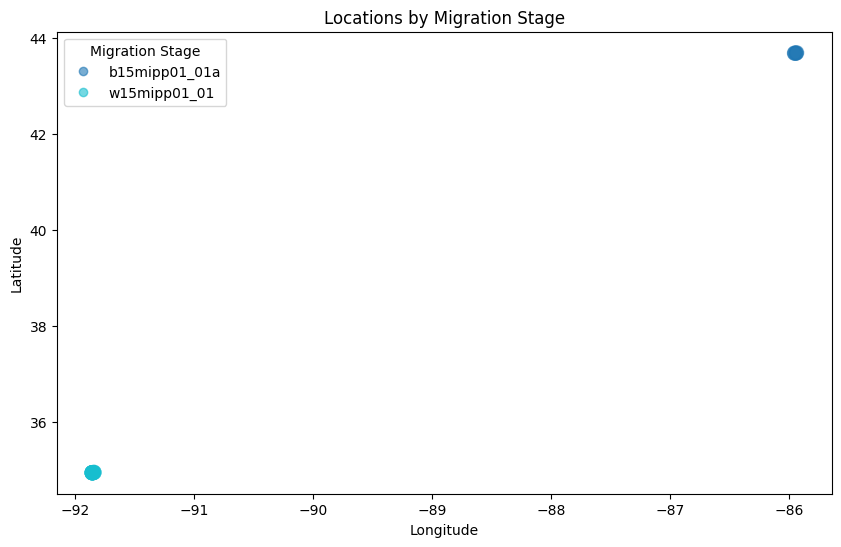

In [115]:
# Assign a color to each migration stage
stages = indiv['migration-stage'].astype('category')
colors = stages.cat.codes

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    indiv['location-long'], 
    indiv['location-lat'], 
    c=colors, 
    cmap='tab10', 
    alpha=0.5, 
    s=100,
    norm=plt.Normalize(vmin=colors.min(), vmax=colors.max())
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations by Migration Stage')
# Add legend
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, stages.cat.categories, title="Migration Stage")

plt.savefig(f"{species}/plots/indiv_locations.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [116]:
# Filter migration stages starting with 'b' and 'w'
df_bw = (df[df['migration-stage'].str.startswith(('b', 'w'))]).copy()

# Group by individual-local-identifier and migration-stage prefix
df_bw.loc[:, 'stage_prefix'] = df_bw['migration-stage'].str[0]
routes = df_bw.groupby(['individual-local-identifier', 'stage_prefix'])[['location-long', 'location-lat']].mean().unstack()

# Rename columns for clarity
routes.columns = ['avg_long_b', 'avg_long_w', 'avg_lat_b', 'avg_lat_w']
routes = routes.reset_index()

In [117]:
routes = routes.dropna()
len(routes)

50

In [118]:
routes.head()

,individual-local-identifier,avg_long_b,avg_long_w,avg_lat_b,avg_lat_w
0,15LA01,-82.788490,-91.713833,42.822678,30.494222
2,15LA03,-72.024991,-91.263600,44.785843,32.243900
3,15LA04,-65.096166,-91.690103,47.629906,30.494828
5,15LA06,-79.503840,-93.350560,48.225467,30.827240
7,15LA08,-95.050389,-93.359341,49.887426,30.823805


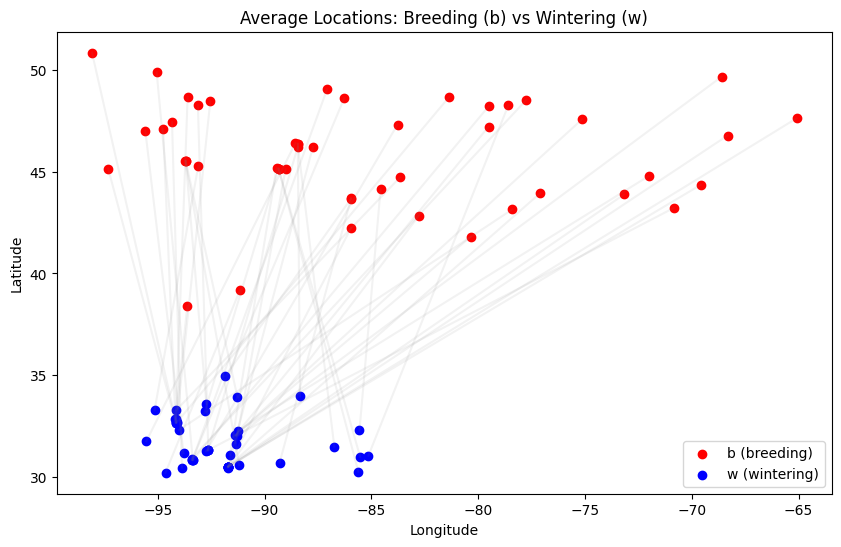

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(routes['avg_long_b'], routes['avg_lat_b'], color='red', label='b (breeding)')
plt.scatter(routes['avg_long_w'], routes['avg_lat_w'], color='blue', label='w (wintering)')

# Draw lines connecting breeding and wintering locations for each individual
for _, row in routes.iterrows():
    plt.plot([row['avg_long_b'], row['avg_long_w']], [row['avg_lat_b'], row['avg_lat_w']], color='gray', alpha=0.1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Locations: Breeding (b) vs Wintering (w)')
plt.legend()

plt.savefig(f"{species}/plots/real_routes.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [120]:
routes['cell_b'] = routes.apply(lambda row: h3.latlng_to_cell(row['avg_lat_b'], row['avg_long_b'], resolution), axis=1)
routes['cell_w'] = routes.apply(lambda row: h3.latlng_to_cell(row['avg_lat_w'], row['avg_long_w'], resolution), axis=1)

In [121]:
print(routes['cell_w'].iloc[0])
print(routes['cell_b'].iloc[0])

8444409ffffffff
842ab67ffffffff


In [122]:
routes.columns

Index(['individual-local-identifier', 'avg_long_b', 'avg_long_w', 'avg_lat_b',
       'avg_lat_w', 'cell_b', 'cell_w'],
      dtype='object')

In [123]:
# probabilities = routes.merge(
#     flow_leapfrog[['departure_cell', 'destination_cell', 'probability']],
#     left_on=['cell_w', 'cell_b'],
#     right_on=['departure_cell', 'destination_cell'],
#     how='left'
# )
# probabilities = probabilities[['departure_cell', 'destination_cell', 'probability']]

In [124]:
# probabilities.dropna().head()

In [125]:
# TODO точно можно оптимизировать чтобы каждую точку много раз не обрабатывать
# сейчас сложность O(N*M) мне кажется можно сделать как-то O(N)

# а зачем я вообще все суммирую? мне же нужны только выбранные. такой тупой

In [ ]:
# def departure_aggregation(flow: pd.DataFrame, departure_radius: int) -> pd.DataFrame:
#     """
#     Aggregates flows by expanding departure cells within a given radius.
#     Mutates `flow` in place: updates flow, departure_value, and probability.
#     """

#     # Build lookup dict for fast access: (dep, dest) → (flow, departure_value)
#     flow_lookup = {
#         (dep, dest): (f, dv)
#         for dep, dest, f, dv in flow[['departure_cell', 'destination_cell', 'flow', 'departure_value']].itertuples(index=False)
#     }

#     # Reset target columns in place
#     flow['flow'] = 0.0
#     flow['departure_value'] = 0.0
#     flow['probability'] = 0.0

#     for row in flow.itertuples(index=True):
#         neighbors = h3.grid_disk(row.departure_cell, departure_radius)

#         total_flow, total_dep_val = 0.0, 0.0
#         for neighbor in neighbors:
#             match = flow_lookup.get((neighbor, row.destination_cell))
#             if match:
#                 f, dv = match
#                 total_flow += f
#                 total_dep_val += dv

#         flow.at[row.Index, 'flow'] = total_flow
#         flow.at[row.Index, 'departure_value'] = total_dep_val
#         flow.at[row.Index, 'probability'] = total_flow / total_dep_val if total_dep_val != 0 else 0

# def calculate_probabilities(routes: pd.DataFrame, flow: pd.DataFrame, destination_radius: int) -> pd.DataFrame:
#     """
#     Computes probabilities for routes by summing probabilities of flows
#     whose destinations are within the given radius of the route destination.
#     Mutates `routes` in place: adds/updates 'probability' column.
#     """

#     # Build lookup dict: (dep, dest) → probability
#     prob_lookup = {
#         (dep, dest): p
#         for dep, dest, p in flow[['departure_cell', 'destination_cell', 'probability']].itertuples(index=False)
#     }

#     # Initialize/overwrite probability column in place
#     routes['probability'] = 0.0

#     for row in routes.itertuples(index=True):
#         neighbors = h3.grid_disk(row.cell_b, destination_radius)

#         total_prob = 0
#         for neighbor in neighbors:
#             total_prob += prob_lookup.get((row.cell_w, neighbor), 0)

#         routes.at[row.Index, 'probability'] = total_prob

In [256]:
def departure_aggregation(flow: pd.DataFrame, routes: pd.DataFrame,
                                  departure_radius: int, destination_radius: int) -> pd.DataFrame:
    """
    Aggregates only (dep, dest) pairs needed for calculate_probabilities(),
    preserving all combinations that could appear in the destination neighborhoods.
    """

    # --- 1️⃣ Determine the relevant cells ---
    route_deps = routes['cell_w'].unique().tolist()
    route_dests = routes['cell_b'].unique().tolist()

    # Expand route destinations by destination_radius
    expanded_dests = set()
    for dest in route_dests:
        expanded_dests |= set(h3.grid_disk(dest, destination_radius))

    # --- 2️⃣ Filter flow to only relevant (dep, dest) pairs ---
    flow_filtered = flow[
        flow['departure_cell'].isin(route_deps)
        & flow['destination_cell'].isin(expanded_dests)
    ].copy()

    # --- 3️⃣ Build lookup for fast access ---
    flow_lookup = {
        (dep, dest): (f, dv)
        for dep, dest, f, dv in flow_filtered[['departure_cell', 'destination_cell', 'flow', 'departure_value']].itertuples(index=False)
    }

    # --- 4️⃣ Aggregate for relevant pairs ---
    results = []
    for (dep, dest) in flow_filtered[['departure_cell', 'destination_cell']].itertuples(index=False):
        neighbors = h3.grid_disk(dep, departure_radius)

        total_flow, total_dep_val = 0.0, 0.0
        for neighbor in neighbors:
            match = flow_lookup.get((neighbor, dest))
            if match:
                f, dv = match
                total_flow += f
                total_dep_val += dv

        prob = total_flow / total_dep_val if total_dep_val != 0 else 0
        results.append((dep, dest, total_flow, total_dep_val, prob))

    # --- 5️⃣ Build result DataFrame ---
    df_out = pd.DataFrame(results, columns=['departure_cell', 'destination_cell', 'flow', 'departure_value', 'probability'])
    return df_out

In [253]:
def calculate_probabilities(routes: pd.DataFrame, flow: pd.DataFrame, destination_radius: int) -> pd.DataFrame:
    """
    Computes probabilities for routes by summing probabilities of flows
    whose destinations are within the given radius of the route destination.
    Mutates `routes` in place: adds/updates 'probability' column.
    """

    # Build lookup dict: (dep, dest) → probability
    prob_lookup = {
        (dep, dest): p
        for dep, dest, p in flow[['departure_cell', 'destination_cell', 'probability']].itertuples(index=False)
    }

    # Initialize/overwrite probability column in place
    routes['probability'] = 0.0

    for row in routes.itertuples(index=True):
        neighbors = h3.grid_disk(row.cell_b, destination_radius)

        total_prob = 0
        for neighbor in neighbors:
            total_prob += prob_lookup.get((row.cell_w, neighbor), 0)

        routes.at[row.Index, 'probability'] = total_prob

In [260]:
if ln:
    flow_leapfrog = pd.read_csv(f'{species}/tables/ln_models/ln_leapfrog.csv')
else:
    flow_leapfrog = pd.read_csv(f'{species}/tables/leapfrog/leapfrog_{alpha}.csv')
probabilities_lf = routes.copy()
flow_leapfrog = departure_aggregation(flow_leapfrog, routes, departure_radius, destination_radius)
calculate_probabilities(probabilities_lf, flow_leapfrog, destination_radius)
routes['leapfrog'] = probabilities_lf['probability'].values

probabilities_lf.probability[probabilities_lf.probability > 0]

0     0.019529
2     0.048805
3     0.028870
5     0.059828
7     0.060833
8     0.067105
9     0.070304
10    0.068557
11    0.032003
12    0.037042
13    0.108015
14    0.081449
16    0.085349
17    0.043559
18    0.023193
20    0.036660
21    0.065322
22    0.081426
23    0.055976
25    0.051272
26    0.061226
27    0.054911
28    0.048548
31    0.064050
32    0.030675
33    0.050887
34    0.017660
35    0.091609
36    0.001549
37    0.095096
38    0.027584
40    0.022592
41    0.034039
42    0.030812
43    0.069111
44    0.025572
45    0.035790
46    0.037868
47    0.098276
48    0.096351
49    0.098624
50    0.002345
51    0.062332
52    0.069402
53    0.083674
54    0.059166
55    0.049955
56    0.034022
57    0.055075
58    0.059931
Name: probability, dtype: float64

In [261]:
if ln:
    flow_chain = pd.read_csv(f'{species}/tables/ln_models/ln_chain.csv')
else:
    flow_chain = pd.read_csv(f'{species}/tables/chain/chain_{alpha}.csv')
probabilities_chain = routes.copy()
flow_chain = departure_aggregation(flow_chain, routes, departure_radius, destination_radius)
calculate_probabilities(probabilities_chain, flow_chain, destination_radius)
routes['chain'] = probabilities_chain['probability'].values

probabilities_chain.probability[probabilities_chain.probability > 0]

0     0.033404
2     0.031621
3     0.015973
5     0.043463
7     0.060621
8     0.128413
9     0.125997
10    0.057877
11    0.105508
12    0.041156
13    0.090106
14    0.101669
16    0.094824
17    0.039380
18    0.024346
20    0.030014
21    0.094680
22    0.076716
23    0.063536
25    0.090328
26    0.037979
27    0.091104
28    0.032695
31    0.065631
32    0.019400
33    0.034427
34    0.058948
35    0.098942
36    0.002786
37    0.099934
38    0.026153
40    0.032119
41    0.020222
42    0.039870
43    0.052849
44    0.024165
45    0.042021
46    0.093279
47    0.095957
48    0.095463
49    0.102901
50    0.013578
51    0.082789
52    0.084971
53    0.108911
54    0.076248
55    0.029716
56    0.019199
57    0.030613
58    0.106198
Name: probability, dtype: float64

In [262]:
flow_naive = pd.read_csv(f'{species}/tables/naive/naive_{alpha}.csv')
probabilities_naive = routes.copy()
flow_naive = departure_aggregation(flow_naive, routes, departure_radius, destination_radius)
calculate_probabilities(probabilities_naive, flow_naive, destination_radius)
routes['naive'] = probabilities_naive['probability'].values

probabilities_naive.probability[probabilities_naive.probability > 0]

0     0.020073
2     0.100573
3     0.069815
5     0.109394
7     0.052514
8     0.064791
9     0.064791
10    0.114129
11    0.032226
12    0.047969
13    0.045087
14    0.065305
16    0.071637
17    0.079556
18    0.003290
20    0.056178
21    0.062287
22    0.057233
23    0.057233
25    0.053345
26    0.132137
27    0.056085
28    0.091104
31    0.098605
32    0.059400
33    0.083314
34    0.016075
35    0.080614
36    0.000250
37    0.055720
38    0.018283
40    0.022892
41    0.093233
42    0.037648
43    0.127325
44    0.029623
45    0.032226
46    0.034369
47    0.045087
48    0.041060
49    0.079369
50    0.000905
51    0.064791
52    0.064791
53    0.064791
54    0.033809
55    0.093191
56    0.067732
57    0.129219
58    0.045087
Name: probability, dtype: float64

In [263]:
if ln:
    flow_fcfs = pd.read_csv(f'{species}/tables/ln_models/ln_fcfs.csv')
else:
    flow_fcfs = pd.read_csv(f'{species}/tables/fcfs/fcfs_{alpha}.csv')
probabilities_fcfs = routes.copy()
flow_fcfs = departure_aggregation(flow_fcfs, routes, departure_radius, destination_radius)
calculate_probabilities(probabilities_fcfs, flow_fcfs, destination_radius)
routes['fcfs'] = probabilities_fcfs['probability'].values

probabilities_fcfs.probability[probabilities_fcfs.probability > 0]

0     0.022923
2     0.081868
3     0.053061
5     0.084195
7     0.056965
8     0.058509
9     0.060389
10    0.095782
11    0.032984
12    0.041261
13    0.069659
14    0.067232
16    0.079666
17    0.061618
18    0.012501
20    0.049847
21    0.058533
22    0.071744
23    0.051334
25    0.046919
26    0.101648
27    0.049640
28    0.070883
31    0.076511
32    0.050355
33    0.069841
34    0.019137
35    0.080361
36    0.001871
37    0.074726
38    0.026931
40    0.021054
41    0.067983
42    0.031789
43    0.098234
44    0.030866
45    0.030634
46    0.034265
47    0.066425
48    0.062237
49    0.093404
50    0.003682
51    0.056037
52    0.059995
53    0.068592
54    0.044953
55    0.077472
56    0.056074
57    0.098364
58    0.048648
Name: probability, dtype: float64

In [264]:
if ln:
    flow_flp = pd.read_csv(f'{species}/tables/ln_models/ln_favorite leapfrog.csv')
else:
    flow_flp = pd.read_csv(f'{species}/tables/favorite leapfrog/favorite leapfrog_{alpha}.csv')
probabilities_flp = routes.copy()
flow_flp = departure_aggregation(flow_flp, routes, departure_radius, destination_radius)
calculate_probabilities(probabilities_flp, flow_flp, destination_radius)
routes['favorite leapfrog'] = probabilities_flp['probability'].values

probabilities_flp.probability[probabilities_flp.probability > 0]

0     0.021879
2     0.061342
3     0.038682
5     0.075053
7     0.068717
8     0.069739
9     0.073402
10    0.086080
11    0.034451
12    0.040563
13    0.095063
14    0.085377
16    0.105330
17    0.056405
18    0.017574
20    0.040790
21    0.071438
22    0.100717
23    0.061655
25    0.053745
26    0.080251
27    0.058517
28    0.061679
31    0.076100
32    0.037104
33    0.058145
34    0.019965
35    0.102269
36    0.001888
37    0.096294
38    0.029495
40    0.023000
41    0.047260
42    0.033249
43    0.086404
44    0.027240
45    0.033297
46    0.038173
47    0.089342
48    0.085007
49    0.117941
50    0.003110
51    0.065478
52    0.073002
53    0.088345
54    0.056132
55    0.059098
56    0.042349
57    0.073626
58    0.059905
Name: probability, dtype: float64

In [265]:
if ln:
    flow_fch = pd.read_csv(f'{species}/tables/ln_models/ln_favorite chain.csv')
else:
    flow_fch = pd.read_csv(f'{species}/tables/favorite chain/favorite chain_{alpha}.csv')
probabilities_fch = routes.copy()
flow_fch = departure_aggregation(flow_fch, routes, departure_radius, destination_radius)
calculate_probabilities(probabilities_fch, flow_fch, destination_radius)
routes['favorite chain'] = probabilities_fch['probability'].values

probabilities_fch.probability[probabilities_fch.probability > 0]

0     0.022729
2     0.049466
3     0.027200
5     0.066456
7     0.082298
8     0.150155
9     0.146131
10    0.107030
11    0.059559
12    0.042712
13    0.086018
14    0.121636
16    0.130231
17    0.053465
18    0.015695
20    0.033695
21    0.112401
22    0.088049
23    0.092520
25    0.112000
26    0.063918
27    0.114733
28    0.051077
31    0.091514
32    0.028649
33    0.046902
34    0.033099
35    0.140113
36    0.002703
37    0.106926
38    0.029162
40    0.031765
41    0.034963
42    0.043404
43    0.080519
44    0.020948
45    0.039121
46    0.066285
47    0.090551
48    0.087231
49    0.137101
50    0.011580
51    0.121102
52    0.105497
53    0.116200
54    0.067991
55    0.045935
56    0.031500
57    0.055336
58    0.094256
Name: probability, dtype: float64

In [266]:
if ln:
    flow_fm = pd.read_csv(f'{species}/tables/ln_models/ln_favorite mix.csv')
else:
    flow_fm = pd.read_csv(f'{species}/tables/favorite mix/favorite mix_{alpha}.csv')
probabilities_fm = routes.copy()
flow_fm = departure_aggregation(flow_fm, routes, departure_radius, destination_radius)
calculate_probabilities(probabilities_fm, flow_fm, destination_radius)
routes['favorite mix'] = probabilities_fm['probability'].values

probabilities_fm.probability[probabilities_fm.probability > 0]

0     0.025265
2     0.061036
3     0.036896
5     0.074773
7     0.070019
8     0.077184
9     0.080089
10    0.086419
11    0.052025
12    0.041532
13    0.087698
14    0.088428
16    0.107134
17    0.056487
18    0.016304
20    0.038883
21    0.074694
22    0.100591
23    0.062406
25    0.058793
26    0.080196
27    0.063116
28    0.061174
31    0.076935
32    0.035839
33    0.056200
34    0.035761
35    0.102972
36    0.002477
37    0.096028
38    0.029393
40    0.025878
41    0.045894
42    0.035981
43    0.086503
44    0.025302
45    0.034850
46    0.047969
47    0.084595
48    0.079935
49    0.118715
50    0.011741
51    0.066080
52    0.073347
53    0.091054
54    0.059796
55    0.058296
56    0.041329
57    0.073386
58    0.069588
Name: probability, dtype: float64

In [267]:
routes.head()

,individual-local-identifier,avg_long_b,avg_long_w,avg_lat_b,avg_lat_w,cell_b,cell_w,leapfrog,chain,naive,fcfs,favorite leapfrog,favorite chain,favorite mix,best_model
0,15LA01,-82.788490,-91.713833,42.822678,30.494222,842ab67ffffffff,8444409ffffffff,0.019529,0.033404,0.020073,0.022923,0.021879,0.022729,0.025265,fcfs
2,15LA03,-72.024991,-91.263600,44.785843,32.243900,842bab9ffffffff,8444433ffffffff,0.048805,0.031621,0.100573,0.081868,0.061342,0.049466,0.061036,prob < 0.01
3,15LA04,-65.096166,-91.690103,47.629906,30.494828,842b06dffffffff,8444409ffffffff,0.028870,0.015973,0.069815,0.053061,0.038682,0.027200,0.036896,prob < 0.01
5,15LA06,-79.503840,-93.350560,48.225467,30.827240,842b941ffffffff,84446adffffffff,0.059828,0.043463,0.109394,0.084195,0.075053,0.066456,0.074773,prob < 0.01
7,15LA08,-95.050389,-93.359341,49.887426,30.823805,842703bffffffff,84446adffffffff,0.060833,0.060621,0.052514,0.056965,0.068717,0.082298,0.070019,favorite leapfrog


In [268]:
probs = routes[models].astype(float)

routes['best_model'] = np.where(
    ((probs < 0.01).all(axis=1)) & (~(probs == 0).all(axis=1)),
    'prob < 0.01',
    np.where(
        (probs == 0).all(axis=1),
        'no abundance data',
        probs.idxmax(axis=1)
    )
)

In [269]:
routes.head()

,individual-local-identifier,avg_long_b,avg_long_w,avg_lat_b,avg_lat_w,cell_b,cell_w,leapfrog,chain,naive,fcfs,favorite leapfrog,favorite chain,favorite mix,best_model
0,15LA01,-82.788490,-91.713833,42.822678,30.494222,842ab67ffffffff,8444409ffffffff,0.019529,0.033404,0.020073,0.022923,0.021879,0.022729,0.025265,chain
2,15LA03,-72.024991,-91.263600,44.785843,32.243900,842bab9ffffffff,8444433ffffffff,0.048805,0.031621,0.100573,0.081868,0.061342,0.049466,0.061036,naive
3,15LA04,-65.096166,-91.690103,47.629906,30.494828,842b06dffffffff,8444409ffffffff,0.028870,0.015973,0.069815,0.053061,0.038682,0.027200,0.036896,naive
5,15LA06,-79.503840,-93.350560,48.225467,30.827240,842b941ffffffff,84446adffffffff,0.059828,0.043463,0.109394,0.084195,0.075053,0.066456,0.074773,naive
7,15LA08,-95.050389,-93.359341,49.887426,30.823805,842703bffffffff,84446adffffffff,0.060833,0.060621,0.052514,0.056965,0.068717,0.082298,0.070019,favorite chain


In [270]:
routes.to_csv(f'{species}/tables/routes_likelihood{"_ln" if ln else ""}.csv', index = False)

In [11]:
ln = True

In [12]:
routes = pd.read_csv(f'{species}/tables/routes_likelihood{"_ln" if ln else ""}.csv')

In [13]:
zero_mask = routes[models] == 0
zero_mask.head()

,leapfrog,chain,naive,fcfs,favorite leapfrog,favorite mix,favorite chain
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [14]:
zero_mask.sum(axis=0)

leapfrog             0
chain                0
naive                0
fcfs                 0
favorite leapfrog    0
favorite mix         0
favorite chain       0
dtype: int64

In [16]:
non_zero_rows = ~zero_mask.any(axis=1)
routes.loc[non_zero_rows, models].prod(axis=0)

leapfrog             2.609715e-68
chain                7.129030e-66
naive                3.317812e-68
fcfs                 7.883196e-67
favorite leapfrog    5.576606e-66
favorite mix         1.666545e-64
favorite chain       1.431252e-62
dtype: float64

In [17]:
model_colors = {
    'leapfrog': 'green', 
    'chain': 'purple', 
    'naive': 'pink', 
    'fcfs': 'orange',
    'favorite leapfrog': 'cyan', 
    'favorite chain': 'midnightblue', 
    'favorite mix': 'yellow',
    'prob < 0.01': 'lightgrey', 
    'no abundance data': 'white'
    }

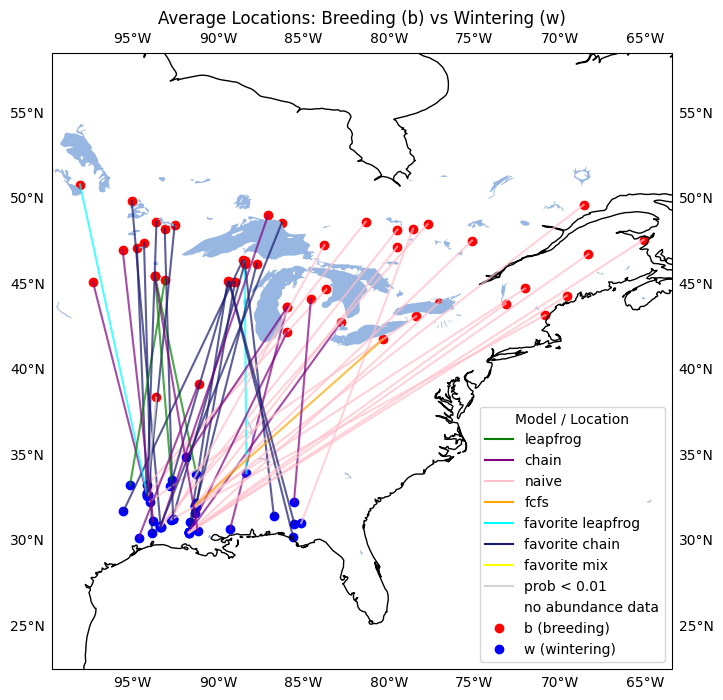

In [18]:
# TODO fix this

# Create a figure and axis with Cartopy projection, set square aspect
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8, 8))

# Add coastlines and countries
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
gl = ax.gridlines(draw_labels=True)
gl.xlines = False  # turn off vertical lines
gl.ylines = False  # turn off horizontal lines

ax.scatter(routes['avg_long_b'], routes['avg_lat_b'], color='red', label='b (breeding)')
ax.scatter(routes['avg_long_w'], routes['avg_lat_w'], color='blue', label='w (wintering)')

# Draw lines connecting breeding and wintering locations for each individual
for _, row in routes.iterrows():
    ax.plot(
        [row['avg_long_b'], row['avg_long_w']],
        [row['avg_lat_b'], row['avg_lat_w']],
        color=model_colors.get(row['best_model'], 'black'),
        alpha=0.7
    )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Locations: Breeding (b) vs Wintering (w)')

# Custom legend for line colors
import matplotlib.lines as mlines
handles = [
    mlines.Line2D([], [], color=color, label=model)
    for model, color in model_colors.items()
]
ax.legend(handles=handles + [
    mlines.Line2D([], [], color='red', marker='o', linestyle='', label='b (breeding)'),
    mlines.Line2D([], [], color='blue', marker='o', linestyle='', label='w (wintering)')
], title="Model / Location")

# Set aspect to be square
ax.set_aspect('equal', adjustable='datalim')

plt.savefig(f"{species}/plots/best_model_{radius}_.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [19]:
routes.tail(10)

,individual-local-identifier,avg_long_b,avg_long_w,avg_lat_b,avg_lat_w,cell_b,cell_w,leapfrog,chain,naive,fcfs,favorite leapfrog,favorite chain,favorite mix,best_model
40,TXPP01,-93.601550,-94.152627,48.690649,32.652885,842708dffffffff,84444ddffffffff,0.098624,0.102901,0.079369,0.093404,0.117941,0.137101,0.118715,favorite chain
41,TXPP02,-91.143098,-94.636820,39.203462,30.200470,8426465ffffffff,844468dffffffff,0.002345,0.013578,0.000905,0.003682,0.003110,0.011580,0.011741,chain
42,WIPP01,-89.346313,-85.611751,45.155109,30.253043,8427425ffffffff,8444e55ffffffff,0.062332,0.082789,0.064791,0.056037,0.065478,0.121102,0.066080,favorite chain
43,WIPP02,-89.344595,-85.528213,45.153677,30.984000,8427425ffffffff,8444e1dffffffff,0.069402,0.084971,0.064791,0.059995,0.073002,0.105497,0.073347,favorite chain
44,WIPP03,-89.344986,-92.793744,45.155654,33.229568,8427425ffffffff,8444485ffffffff,0.083674,0.108911,0.064791,0.068592,0.088345,0.116200,0.091054,favorite chain
45,Woodcock 1,-95.581656,-93.793538,47.018749,31.160769,8426245ffffffff,84446a1ffffffff,0.059166,0.076248,0.033809,0.044953,0.056132,0.067991,0.059796,chain
46,Woodcock 2,-73.170406,-91.714684,43.884767,30.505526,842b8ddffffffff,8444409ffffffff,0.049955,0.029716,0.093191,0.077472,0.059098,0.045935,0.058296,naive
47,Woodcock 4,-69.584209,-91.714071,44.357350,30.505000,842b1a7ffffffff,8444409ffffffff,0.034022,0.019199,0.067732,0.056074,0.042349,0.031500,0.041329,naive
48,Woodcock 5,-68.326478,-91.718000,46.782587,30.457282,842b139ffffffff,8444409ffffffff,0.055075,0.030613,0.129219,0.098364,0.073626,0.055336,0.073386,naive
49,Woodcock 7,-93.702871,-91.187222,45.524926,30.571889,8427525ffffffff,844440dffffffff,0.059931,0.106198,0.045087,0.048648,0.059905,0.094256,0.069588,chain


In [8]:
df_amewoo = pd.read_csv('/home/gkim/birds/lobcur/tables/routes_likelihood.csv')

In [9]:
df_amewoo

 

,individual-local-identifier,avg_long_b,avg_long_w,avg_lat_b,avg_lat_w,cell_b,cell_w,leapfrog,chain,naive,fcfs,favorite leapfrog,favorite chain,favorite mix,best_model
0,LBCU_2007_Y2,-115.218690,-119.277380,40.704335,36.032155,84299bbffffffff,8429a8dffffffff,3.945648e-01,0.000000e+00,0.093371,8.297688e-02,2.387124e-01,0.116894,2.387124e-01,leapfrog
1,LBCU_2007_Y4,-115.224561,-113.983000,40.700985,31.606750,84299bbffffffff,84485e3ffffffff,0.000000e+00,7.143121e-01,0.093371,1.596461e-02,2.984631e-19,0.413827,5.783589e-14,chain
2,LBCU_2007_Z0,-119.726639,-121.480146,45.787625,38.374179,84288d5ffffffff,8428305ffffffff,3.972741e-02,0.000000e+00,0.024389,7.685615e-09,4.475380e-02,0.000000,4.475380e-02,favorite leapfrog
3,LBCU_2007_Z3,-119.678156,-120.927857,45.785059,37.398871,84288d5ffffffff,8428369ffffffff,9.976518e-03,0.000000e+00,0.024389,2.140721e-08,3.843146e-02,0.059179,3.843146e-02,favorite chain
4,LBCU_2007_Z6,-115.184793,-116.027304,40.746719,30.514052,84299bbffffffff,8448437ffffffff,0.000000e+00,1.202315e+00,0.093371,1.791402e-02,6.283744e-19,1.048827,9.706195e-14,chain
5,LBCU_2007_Z8,-115.219560,-114.231397,40.691260,27.742996,84299bbffffffff,844873bffffffff,0.000000e+00,8.419636e-02,0.093371,1.624664e-01,8.350598e-20,0.386178,2.739054e-15,favorite chain
6,LBCU_2007_Z9,-115.181826,-115.024094,40.745604,32.502821,84299bbffffffff,84485b9ffffffff,0.000000e+00,1.294397e-01,0.093371,4.247899e-02,3.525025e-19,0.034756,3.663359e-14,chain
7,LBCU_2008_D5,-119.673497,-120.022796,45.782723,36.270680,84288d5ffffffff,8429a83ffffffff,1.090578e-02,0.000000e+00,0.024389,5.714764e-08,3.082047e-02,0.056314,3.082047e-02,favorite chain
8,LBCU_2008_D6,-119.713168,-119.986328,45.791822,35.647690,84288d5ffffffff,8429a89ffffffff,8.337700e-03,1.582024e-02,0.024389,7.932627e-08,2.520972e-02,0.049489,2.520972e-02,favorite chain
9,LBCU_2008_D7,-119.706320,-121.444667,45.782714,36.917679,84288d5ffffffff,8429a93ffffffff,1.072808e-02,0.000000e+00,0.024389,2.714785e-08,3.048776e-02,0.057404,3.048776e-02,favorite chain


In [169]:
models = ['leapfrog', 'chain', 'naive', 'fcfs', 'favorite leapfrog', 'favorite mix', 'favorite chain']

In [170]:
zero_mask = df_amewoo[models] == 0
zero_mask.head()

,leapfrog,chain,naive,fcfs,favorite leapfrog,favorite mix,favorite chain
0,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False
2,False,True,False,False,False,False,True
3,False,True,False,False,False,False,False
4,True,False,False,False,False,False,False


In [171]:
zero_mask

,leapfrog,chain,naive,fcfs,favorite leapfrog,favorite mix,favorite chain
0,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False
2,False,True,False,False,False,False,True
3,False,True,False,False,False,False,False
4,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False
6,True,False,False,False,False,False,False
7,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False


In [172]:
zero_mask.sum(axis=0)

leapfrog              9
chain                11
naive                 2
fcfs                  4
favorite leapfrog     2
favorite mix          5
favorite chain        6
dtype: int64

In [173]:
non_zero_rows = ~zero_mask.any(axis=1)
df_amewoo.loc[non_zero_rows, models].prod(axis=0)

leapfrog             3.414841e-23
chain                5.374215e-06
naive                2.571888e-06
fcfs                 1.285680e-14
favorite leapfrog    1.873538e-15
favorite mix         2.757923e-15
favorite chain       3.286208e-04
dtype: float64

In [125]:
len(df_amewoo)

50